In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
import pickle

In [81]:
df=pd.read_csv('C:/Users/Admin/OneDrive/Desktop/EDUCATION/DATA SET_DATATRAINED/PORT_BANK/termdeposit_train.csv')
df.shape

(31647, 18)

In [4]:
df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [5]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [7]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [8]:
for i in df.columns:
    print(i,df[i].unique().size)
    

ID 31647
age 76
job 12
marital 3
education 4
default 2
balance 6326
housing 2
loan 2
contact 3
day 31
month 12
duration 1454
campaign 45
pdays 509
previous 38
poutcome 4
subscribed 2


In [9]:
df=df.drop(columns=['ID'])

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:>

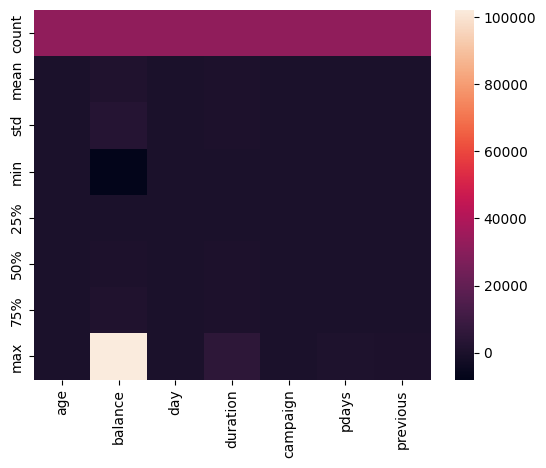

In [11]:
sns.heatmap(df.describe())

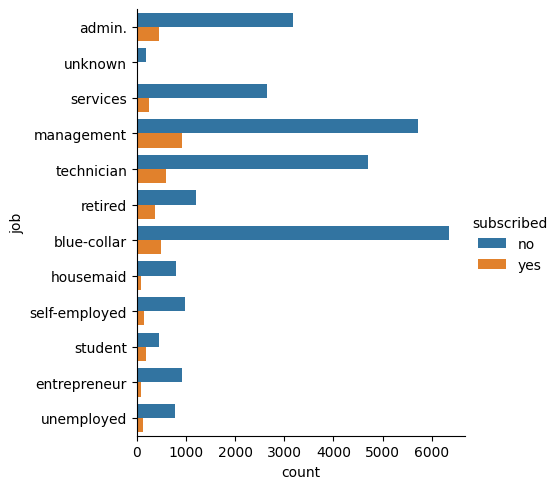

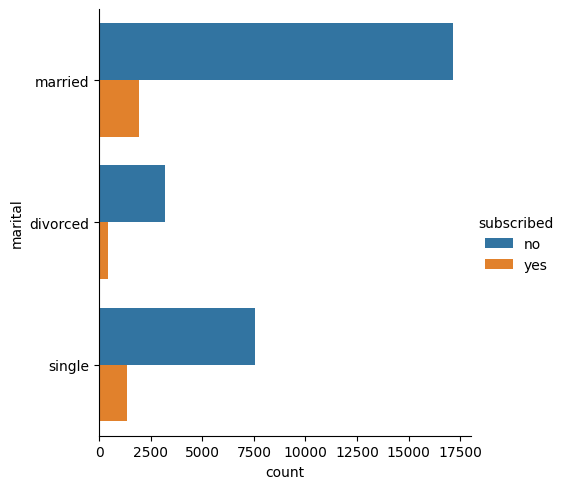

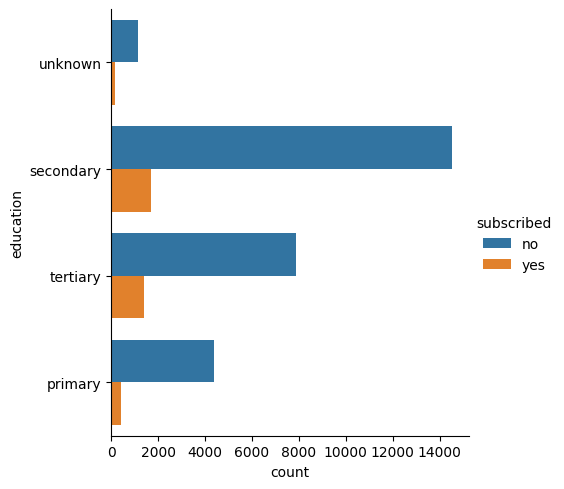

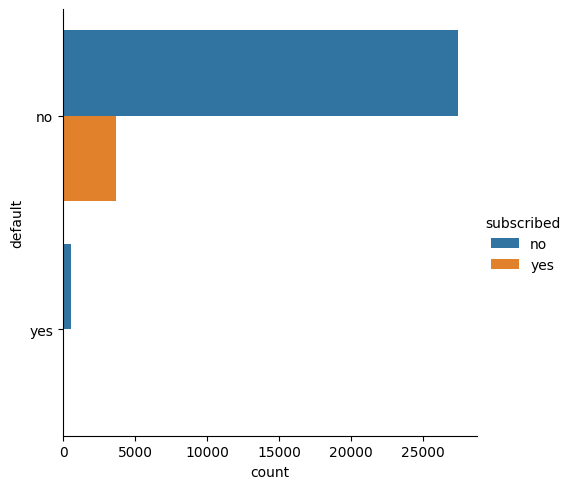

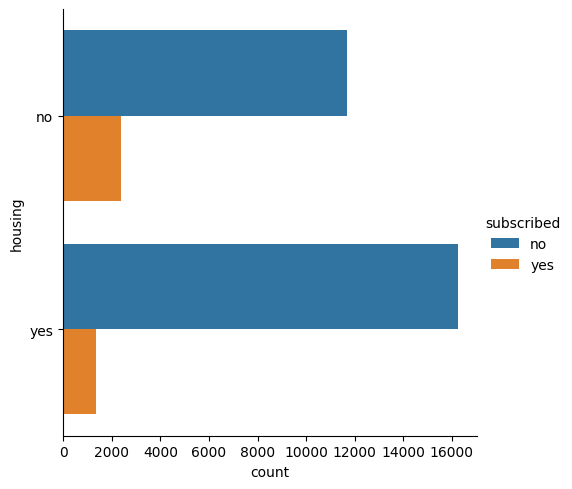

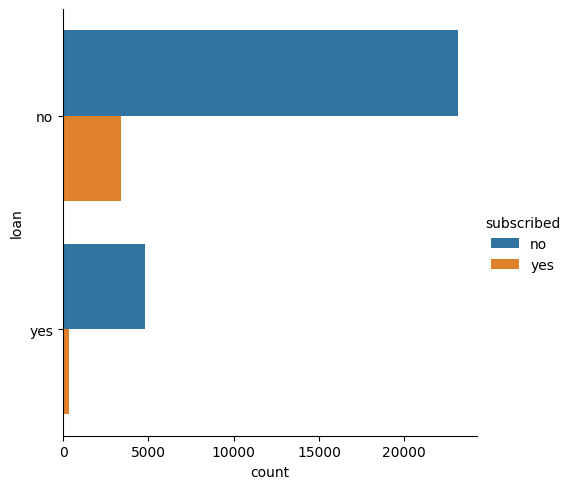

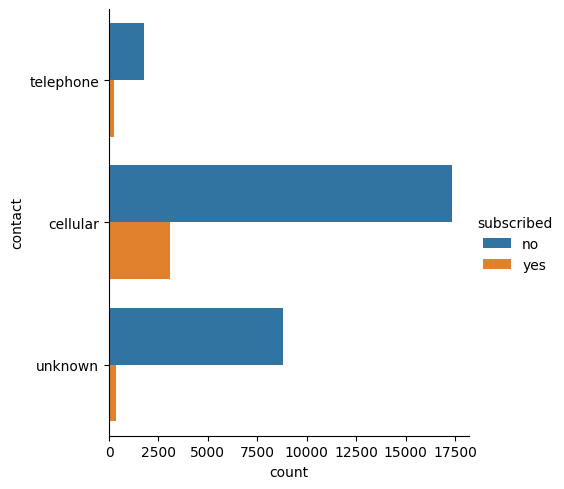

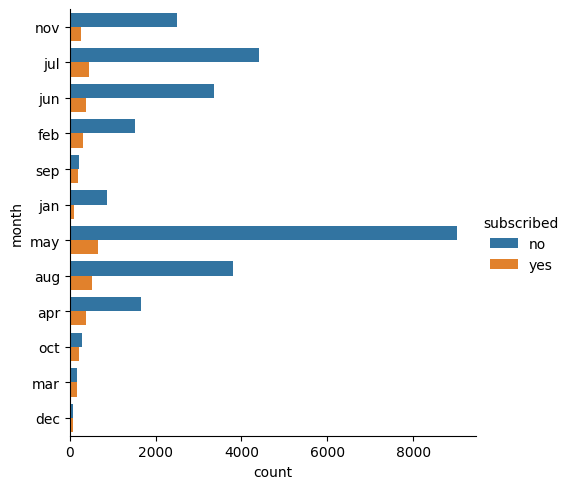

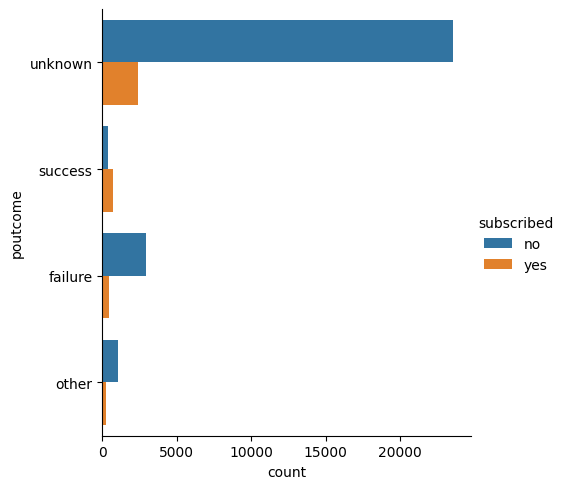

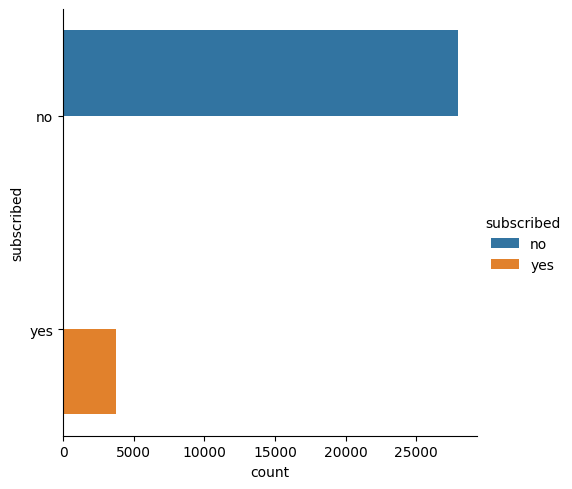

In [12]:
plotnumber=1
for i in df:
    if df[i].dtype==object:
        sns.catplot(data=df,y=i,hue='subscribed',kind='count')
    else:pass
    plt.show()        

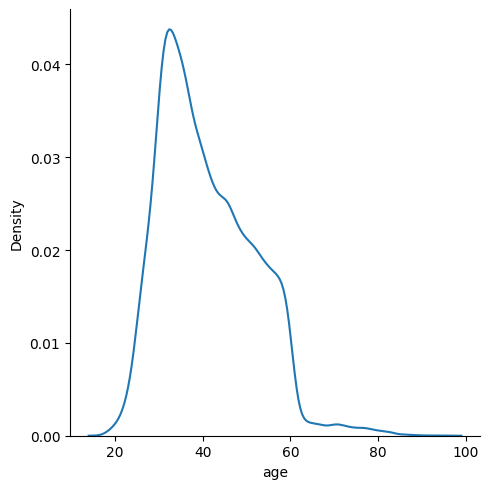

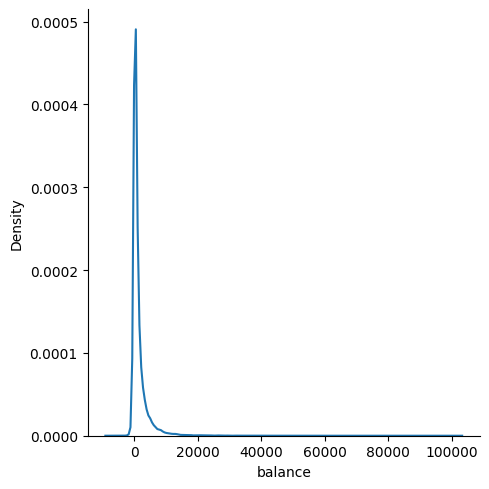

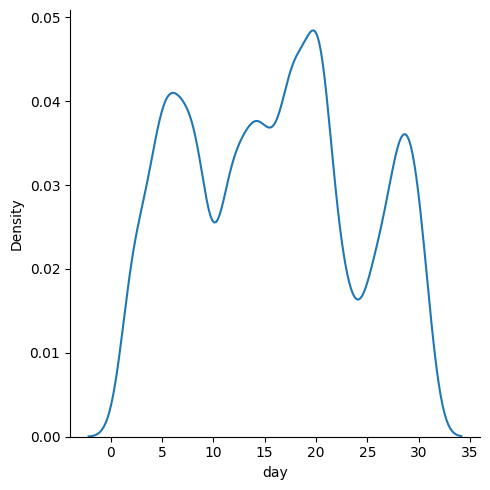

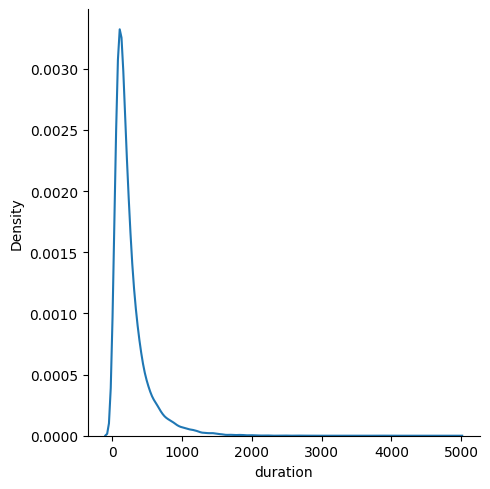

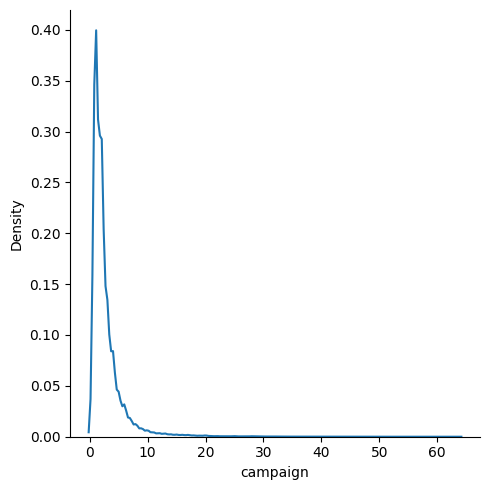

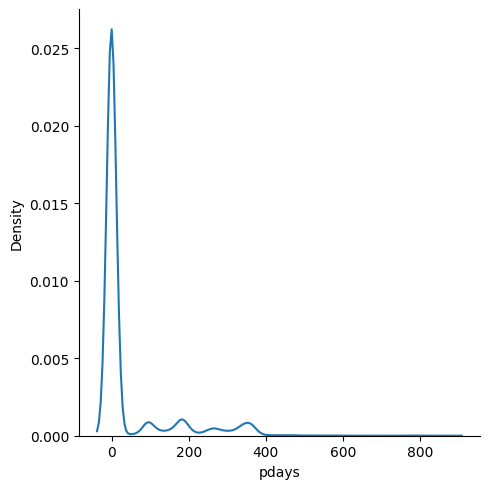

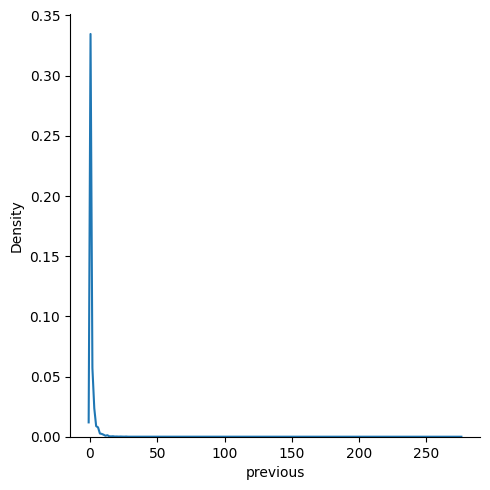

In [13]:
for i in df:
    if df[i].dtype=='int64':
        sns.displot(data=df,x=i,kind='kde')
    else:pass
    plt.show()  

In [14]:
for column in df:
    if df[column].dtype==object:
        oe=OrdinalEncoder()
        df[column]=oe.fit_transform(df[column].values.reshape(-1,1))

df        

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0
31644,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0.0
31645,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0.0


In [16]:
columns=df.columns
out_lier=df[columns]
z=np.abs(zscore(out_lier))
## Removing outlier
df_z=df[(z<3).all(axis=1)]
print('## dataloss:')
print((df.shape[0]-df_z.shape[0])/df.shape[0]*100)

## dataloss:
12.83849969981357


<function matplotlib.pyplot.show(close=None, block=None)>

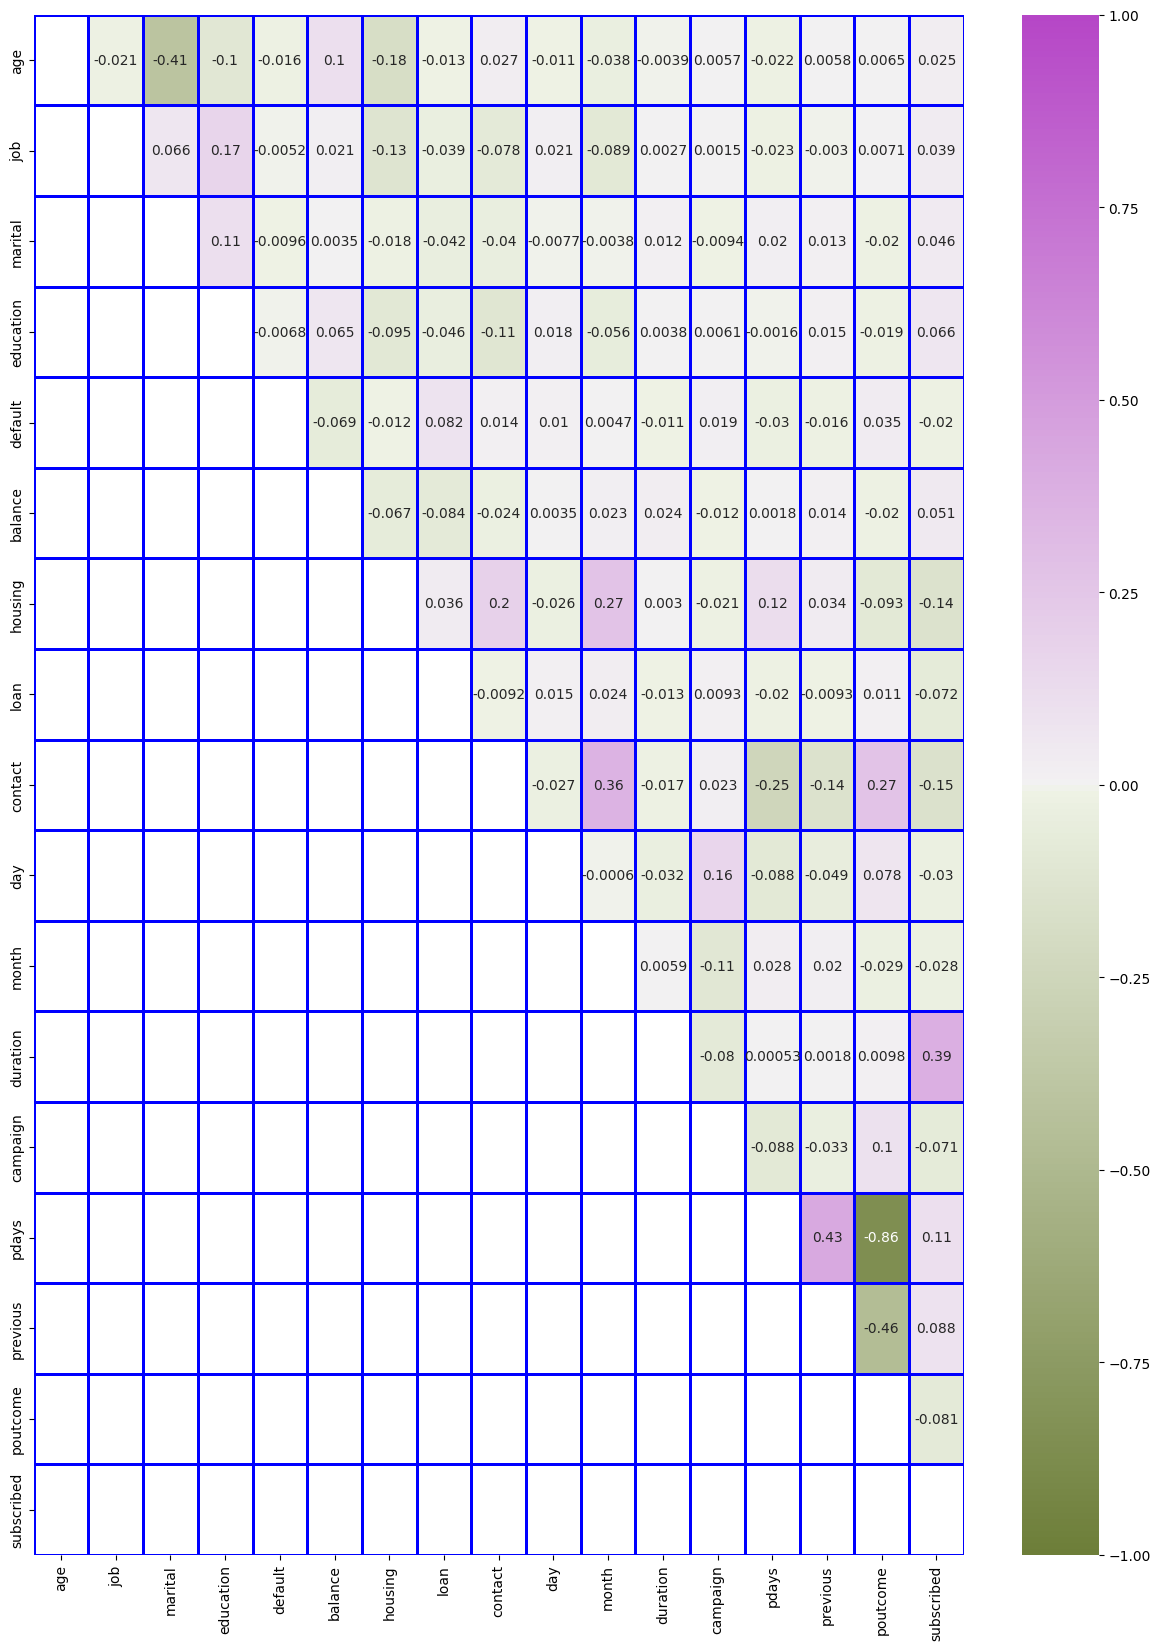

In [77]:
v=df.corr()
plt.figure(figsize=(15,20))
mask=np.zeros_like(v)
mask[np.tril_indices_from(mask)]=True
sns.heatmap(v,vmax=1,vmin=-1,annot=True,annot_kws={'fontsize':10},fmt='0.2g',linewidths=2,linecolor='blue',mask=mask,cmap=sns.diverging_palette(100,300,as_cmap=True))
plt.show

In [61]:
x=df_z.drop(columns=['subscribed'])
y=df_z['subscribed']
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

In [64]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i)for i in range(x.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.273852,age
1,1.050353,job
2,1.228671,marital
3,1.067562,education
4,NaN,default
5,1.033989,balance
6,1.178030,housing
7,1.016757,loan
8,1.324819,contact
9,1.026220,day


In [69]:
print('sample distribution before SMOTE:',y.value_counts())
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)
print('**************************************************')
print('sample distribution after SMOTE:',y1.value_counts())

sample distribution before SMOTE: 0.0    24762
1.0     2822
Name: subscribed, dtype: int64
**************************************************
sample distribution after SMOTE: 0.0    24762
1.0    24762
Name: subscribed, dtype: int64


In [78]:
max_accuracy=0
max_rs=0
for i in range (1000):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=i)
    regression_lr=LogisticRegression()
    regression_lr.fit(x_train,y_train)
    pred=regression_lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > max_accuracy:
        max_accuracy=acc
        max_rs=i

print('Maximum accuracy:',max_accuracy, 'on random state:',max_rs)

Maximum accuracy: 0.8192391567724739 on random state: 677


In [79]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=max_rs)

In [83]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
score_LR=cross_val_score(LR,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_LR))
print('confusion metrics=',confusion_matrix(y_test,pred_LR))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_LR))
print('cross_val_score=',score_LR)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_LR.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_LR)-score_LR.mean())

Accuracy Score= 0.8192391567724739
confusion metrics= [[5086 1115]
 [1123 5057]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      6201
         1.0       0.82      0.82      0.82      6180

    accuracy                           0.82     12381
   macro avg       0.82      0.82      0.82     12381
weighted avg       0.82      0.82      0.82     12381

cross_val_score= [0.7994952  0.81120646 0.80979303 0.81786976 0.80462439]
--------------------------------------------------------------------------------------
avg value: 0.8085977713153799
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.010641385457094032


In [91]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
score_ETC=cross_val_score(ETC,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_ETC))
print('confusion metrics=',confusion_matrix(y_test,pred_ETC))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_ETC))
print('cross_val_score=',score_ETC)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_ETC.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_ETC)-score_ETC.mean())

Accuracy Score= 0.9678539697924239
confusion metrics= [[5886  315]
 [  83 6097]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      6201
         1.0       0.95      0.99      0.97      6180

    accuracy                           0.97     12381
   macro avg       0.97      0.97      0.97     12381
weighted avg       0.97      0.97      0.97     12381

cross_val_score= [0.95870772 0.96678445 0.96799596 0.96728925 0.96617528]
--------------------------------------------------------------------------------------
avg value: 0.9653905335746129
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.002463436217810977


In [92]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
score_DT=cross_val_score(DT,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_DT))
print('confusion metrics=',confusion_matrix(y_test,pred_DT))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_DT))
print('cross_val_score=',score_DT)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_DT.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_DT)-score_DT.mean())

Accuracy Score= 0.9179387771585494
confusion metrics= [[5660  541]
 [ 475 5705]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      6201
         1.0       0.91      0.92      0.92      6180

    accuracy                           0.92     12381
   macro avg       0.92      0.92      0.92     12381
weighted avg       0.92      0.92      0.92     12381

cross_val_score= [0.85360929 0.9340737  0.92942958 0.93427562 0.92932149]
--------------------------------------------------------------------------------------
avg value: 0.9161419348104243
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.0017968423481251605


In [102]:
KNC=KNeighborsClassifier()
KNC.fit(x_train,y_train)
pred_KNC=KNC.predict(x_test)
score_KNC=cross_val_score(KNC,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_KNC))
print('confusion metrics=',confusion_matrix(y_test,pred_KNC))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_KNC))
print('cross_val_score=',score_KNC)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_KNC.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_KNC)-score_KNC.mean())

Accuracy Score= 0.919069542040223
confusion metrics= [[5241  960]
 [  42 6138]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91      6201
         1.0       0.86      0.99      0.92      6180

    accuracy                           0.92     12381
   macro avg       0.93      0.92      0.92     12381
weighted avg       0.93      0.92      0.92     12381

cross_val_score= [0.91267037 0.91509339 0.91913175 0.91559818 0.91619548]
--------------------------------------------------------------------------------------
avg value: 0.9157378333261297
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.0033317087140932733


In [93]:
ADB=AdaBoostClassifier()
ADB.fit(x_train,y_train)
pred_ADB=ETC.predict(x_test)
score_ADB=cross_val_score(ADB,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_ADB))
print('confusion metrics=',confusion_matrix(y_test,pred_ADB))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_ADB))
print('cross_val_score=',score_ADB)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_ADB.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_ADB)-score_ADB.mean())

Accuracy Score= 0.9678539697924239
confusion metrics= [[5886  315]
 [  83 6097]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      6201
         1.0       0.95      0.99      0.97      6180

    accuracy                           0.97     12381
   macro avg       0.97      0.97      0.97     12381
weighted avg       0.97      0.97      0.97     12381

cross_val_score= [0.82019182 0.89692075 0.89520444 0.90227158 0.89499192]
--------------------------------------------------------------------------------------
avg value: 0.8819161028151934
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.08593786697723049


In [94]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred_LR=RF.predict(x_test)
score_LR=cross_val_score(RF,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_LR))
print('confusion metrics=',confusion_matrix(y_test,pred_LR))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_LR))
print('cross_val_score=',score_LR)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_LR.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_LR)-score_LR.mean())

Accuracy Score= 0.9583232372183184
confusion metrics= [[5895  306]
 [ 210 5970]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      6201
         1.0       0.95      0.97      0.96      6180

    accuracy                           0.96     12381
   macro avg       0.96      0.96      0.96     12381
weighted avg       0.96      0.96      0.96     12381

cross_val_score= [0.90540131 0.96426047 0.9634528  0.96466431 0.96243942]
--------------------------------------------------------------------------------------
avg value: 0.9520436635924971
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.006279573625821211


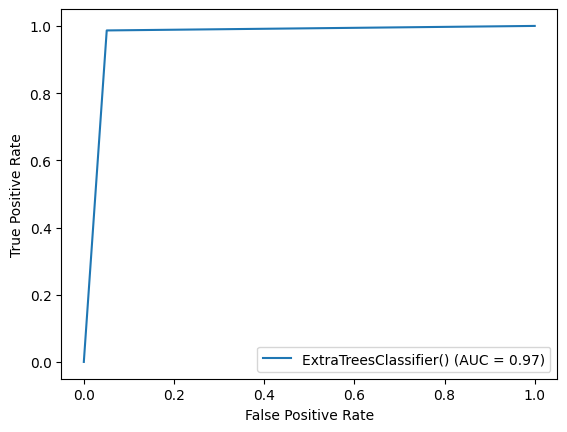

In [109]:
fpr,tpr,thresolds=metrics.roc_curve(y_test,pred_ETC,pos_label=1)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(tpr=tpr,fpr=fpr,roc_auc=roc_auc,estimator_name=ETC)
display.plot()

In [112]:
file_name='PORTUGUESS BANK'
pickle.dump(ETC,open(file_name,'wb'))